<h1> Import necessary libraries </h1>

In [67]:
import pandas as pd 
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Finished!")

Finished!


<h1> Ingesting data </h1>

In [68]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


<h1> Linear regression for prediction </h1>

In [69]:
# Split your data frame into training and test sets: 80% training; 20% test
train = diamonds.sample(frac=0.8,random_state = 200) # Random state is a seed value
test = diamonds.drop(train.index)


In [43]:
test

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
...,...,...,...,...,...,...,...,...,...,...
53921,0.70,Very Good,E,VS2,62.8,60.0,2755,5.59,5.65,3.53
53924,0.73,Ideal,I,VS2,61.6,55.0,2756,5.82,5.84,3.59
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49


In [70]:
train

,carat,cut,color,clarity,depth,table,price,x,y,z
37658,0.42,Premium,F,SI1,60.8,58.0,992,4.87,4.83,2.95
29569,0.41,Good,F,SI1,63.1,59.0,705,4.70,4.75,2.98
49602,0.53,Ideal,G,IF,62.7,56.0,2137,5.23,5.13,3.25
19849,1.50,Very Good,I,SI1,63.1,54.0,8408,7.34,7.31,4.62
42129,0.58,Ideal,F,SI2,61.8,56.0,1279,5.42,5.39,3.34
...,...,...,...,...,...,...,...,...,...,...
12502,1.09,Premium,D,SI2,61.2,60.0,5258,6.64,6.60,4.05
19168,1.25,Premium,D,SI1,62.4,58.0,7924,6.89,6.83,4.28
13035,0.38,Very Good,F,SI2,61.0,61.0,600,4.61,4.67,2.83
19056,1.25,Ideal,F,VS1,62.4,57.0,7840,6.90,6.83,4.29


In [71]:
# Run your regression on your training set only
linear_train = ols('price ~ C(color) + C(clarity)', data = train).fit() 

In [72]:
# Apply your trained regression model to the x's from your test set to generate predicted values of y
predictions_lin = linear_train.predict(test)
predictions_lin

2        2898.851927
3        5086.011354
4        6264.404488
5        4580.682064
17       5214.298389
            ...     
53921    3096.904073
53924    5086.011354
53929    3958.579531
53933    3096.904073
53934    3095.762384
Length: 10788, dtype: float64

<h2> -- Eyeball actual versus predicted </h2>

In [73]:
# Convert predictions into a data frame
predictions_df_lin = pd.DataFrame(predictions_lin)
predictions_df_lin.columns = ['price_predicted']
predictions_df_lin

,price_predicted
2,2898.851927
3,5086.011354
4,6264.404488
5,4580.682064
17,5214.298389
...,...
53921,3096.904073
53924,5086.011354
53929,3958.579531
53933,3096.904073


In [74]:
# Add actual values of "likes"
# Eyeball it: How did our model do?
predictions_df_lin = pd.concat([predictions_df_lin, test['price']], axis=1)
predictions_df_lin

,price_predicted,price
2,2898.851927,327
3,5086.011354,334
4,6264.404488,335
5,4580.682064,336
17,5214.298389,351
...,...,...
53921,3096.904073,2755
53924,5086.011354,2756
53929,3958.579531,2756
53933,3096.904073,2757


<h2> -- Visualize actual versus predicted </h2>

In [75]:
# Pull the row numbers out into their own column for plotting
predictions_df_lin.reset_index(level=0, inplace=True)
predictions_df_lin

,index,price_predicted,price
0,2,2898.851927,327
1,3,5086.011354,334
2,4,6264.404488,335
3,5,4580.682064,336
4,17,5214.298389,351
...,...,...,...
10783,53921,3096.904073,2755
10784,53924,5086.011354,2756
10785,53929,3958.579531,2756
10786,53933,3096.904073,2757


<AxesSubplot:xlabel='index', ylabel='price'>

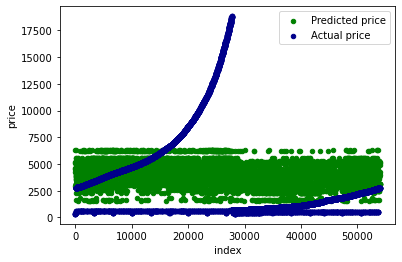

In [76]:
# Plot actual versus predicted
avp = predictions_df_lin.plot.scatter(x = 'index', y = 'price_predicted', color = 'green', label = 'Predicted price')
predictions_df_lin.plot.scatter(x = 'index', y = 'price', color = 'DarkBlue', label = 'Actual price', ax = avp)

<h2> -- Compute a measure of prediction error: mean squared prediction error </h2>

In [77]:
# Define a function for calculating mean squared prediction error 
def mean_sq_prediction_error(y_actual, y_predicted):
    mpe = ((y_actual - y_predicted)**2).mean()
    print("Mean prediction error is % s" % round(mpe, 5)) 

In [84]:
# Run it
mean_sq_prediction_error(predictions_df_lin['price'], predictions_df_lin['price_predicted'])

Mean prediction error is 15196386.6999


In [85]:
# Same thing
mean_sq_prediction_error(test['price'], predictions_lin)

Mean prediction error is 15196386.6999


In [ ]:
# How might you improve performance?  More next time... 

<h1> Logistic regression for prediction </h1>

In [88]:
# Convert status to numeric format
cut_dict = {'Premium': 0,'Premium ': 0,'Very Good': 1, 'Very Good ': 1 'Good': 2, 'Good ': 2, 'Ideal': 3, 'Ideal ':3} 
diamonds['cut_num'] = [cut_dict[item] for item in diamonds.cut]

SyntaxError: invalid syntax (<ipython-input-88-8bd94c4af75c>, line 2)

In [62]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [172]:
# Re-create training and test sets (with new status_num column now included)
train = reviews.sample(frac=0.8,random_state = 200) # Random state is a seed value
test = reviews.drop(train.index)

In [173]:
# Run your regression on your training set only
logit_train = sm.logit('status_num ~ score + C(month)', data=train).fit()  

Optimization terminated successfully.
         Current function value: 0.631761
         Iterations 5


In [174]:
# Apply your trained regression model to the x's from your test set to generate predicted values of y 
predictions_log = logit_train.predict(test) 
predictions_log

0      0.726756
2      0.547407
6      0.687069
7      0.400434
10     0.551522
         ...   
988    0.607212
991    0.780709
994    0.619712
996    0.704413
997    0.763625
Length: 200, dtype: float64

<h2> -- Eyeball actual versus predicted </h2>

In [176]:
# Convert comparison into a data frame
predictions_df_log = pd.DataFrame(predictions_log)
predictions_df_log.columns = ['status_predicted']
predictions_df_log

,status_predicted
0,0.726756
2,0.547407
6,0.687069
7,0.400434
10,0.551522
...,...
988,0.607212
991,0.780709
994,0.619712
996,0.704413


In [177]:
# Convert probabilities to 0 or 1; above 50% = 1; 50% or below = 0
predictions_df_log = predictions_df_log.round(0).astype(int)
predictions_df_log

,status_predicted
0,1
2,1
6,1
7,0
10,1
...,...
988,1
991,1
994,1
996,1


In [178]:
# Add actual values of "status_num"
# Eyeball it: How did our model do?
predictions_df_log = pd.concat([predictions_df_log, test['status_num']], axis=1)
predictions_df_log

,status_predicted,status_num
0,1,1
2,1,0
6,1,1
7,0,0
10,1,1
...,...,...
988,1,1
991,1,1
994,1,1
996,1,1


<h2> -- Compute a measure of prediction error: confusion matrix and performance evaluation</h2>

In [180]:
# Generate a confusion matrix 
# CORRECTED to generate a confusion matrix in the order from the slides:
# TP   FN
# FP   TN
cm = confusion_matrix(predictions_df_log['status_num'], predictions_df_log['status_predicted'], labels =[1,0])  
print ("Confusion Matrix : \n", cm)   

array([[  5,  65],
       [  4, 126]], dtype=int64)

In [181]:
# Generate a precision score
# Precision = True Positives / (True Positives + False Positives)
# Fraction of all values predicted as 1 that are actually 1.

precision_score(predictions_df_log['status_num'], predictions_df_log['status_predicted'])

0.6596858638743456

In [182]:
# Generate a recall score
# Recall = True Positives / (True Positives + False Negatives)
# Fraction of actual 1s that were predicted to be 1.

recall_score(predictions_df_log['status_num'], predictions_df_log['status_predicted'])

0.9692307692307692

In [183]:
# Generate F1 score
# F1 = harmonic mean of precision and recall
f1_score(predictions_df_log['status_num'], predictions_df_log['status_predicted'])

0.7850467289719627

In [ ]:
# How might you improve performance?  More next time... 